In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier


In [34]:
data = pd.read_csv('/Users/caseykeenan/sfdat28/data/yelp.csv', index_col=0)
data.head()

,date,review_id,stars,text,type,user_id,cool,useful,funny
business_id,,,,,,,,,
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [35]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


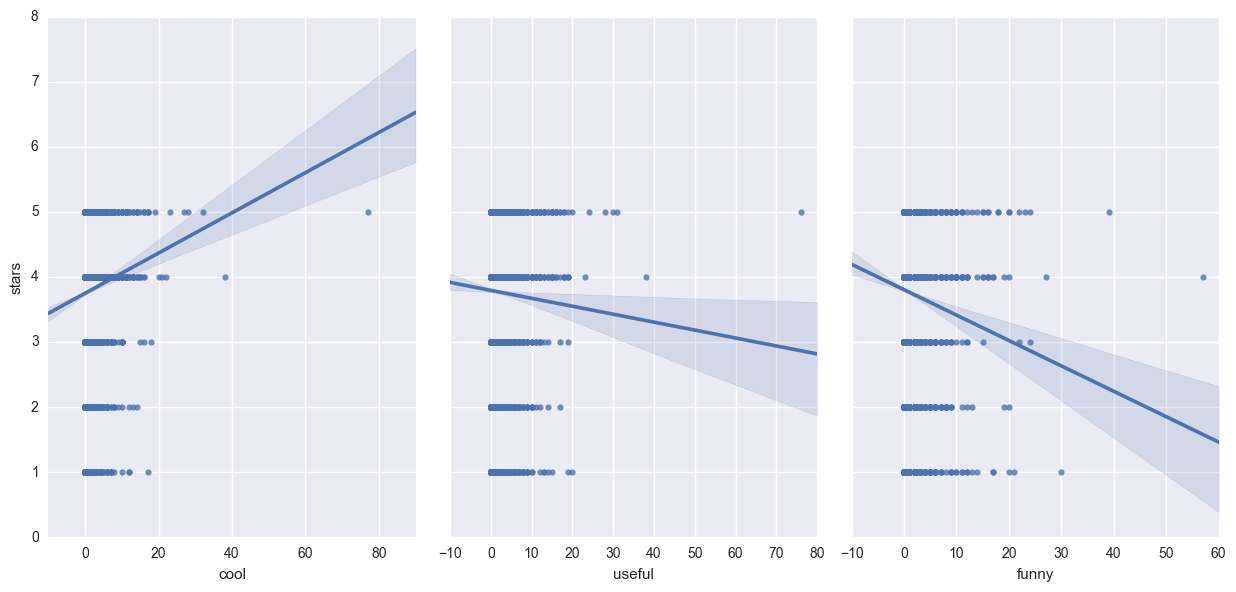

In [36]:
sns.pairplot(data, x_vars=['cool','useful','funny'], y_vars='stars', size=6, aspect=0.7, kind = 'reg')

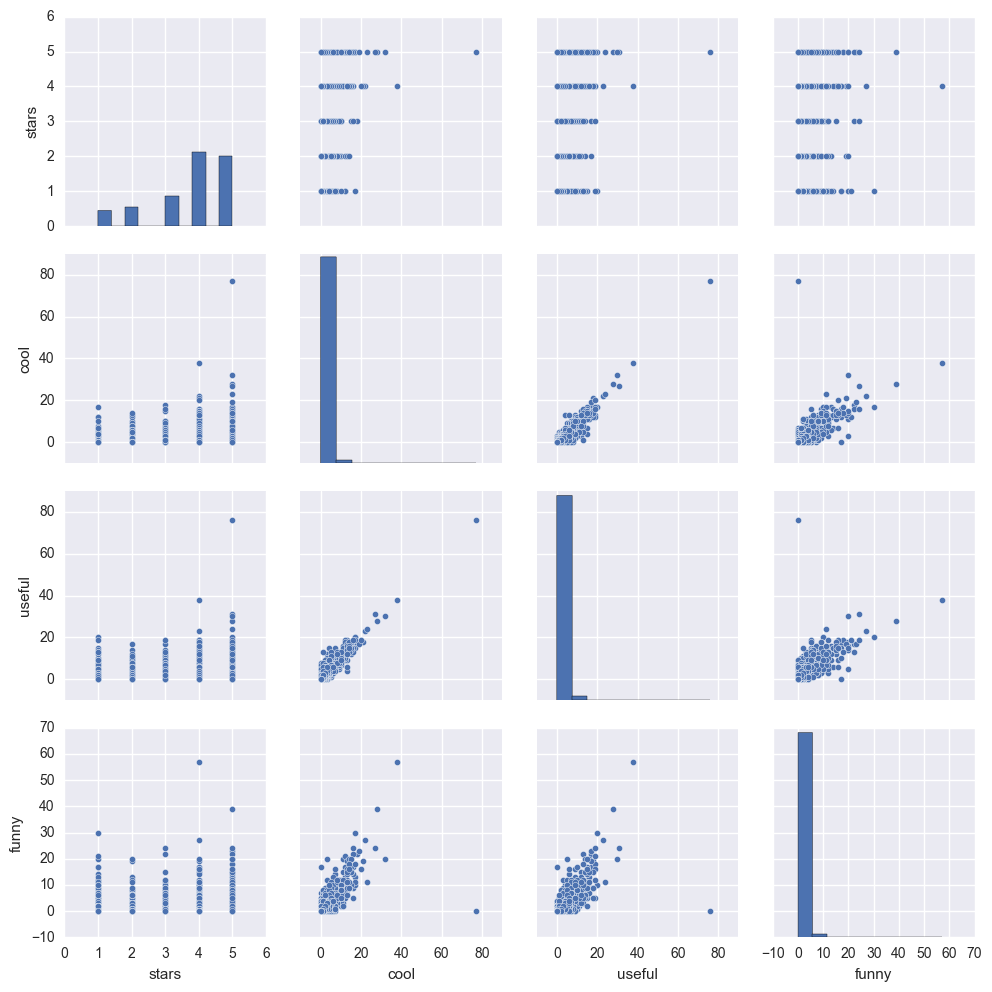

In [37]:
sns.pairplot(data)

In [38]:
data.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


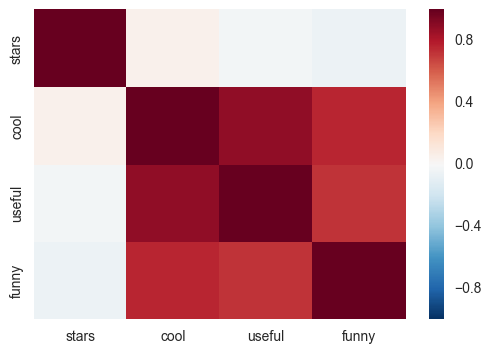

In [39]:
sns.heatmap(data.corr())

In [40]:
# create X and y
feature_cols = ['cool','useful','funny']
X = data[feature_cols]
y = data.stars

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [41]:
scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
scores

[0.31119999999999998,
 0.28860000000000002,
 0.30370000000000003,
 0.35880000000000001,
 0.35770000000000002,
 0.35659999999999997,
 0.3594,
 0.36370000000000002,
 0.35489999999999999,
 0.35820000000000002,
 0.35709999999999997,
 0.36020000000000002,
 0.36720000000000003,
 0.36480000000000001,
 0.3624,
 0.36470000000000002,
 0.36470000000000002,
 0.36470000000000002,
 0.36520000000000002,
 0.36459999999999998,
 0.36549999999999999,
 0.36520000000000002,
 0.3664,
 0.3649,
 0.36609999999999998,
 0.36530000000000001,
 0.36509999999999998,
 0.36449999999999999,
 0.36620000000000003]

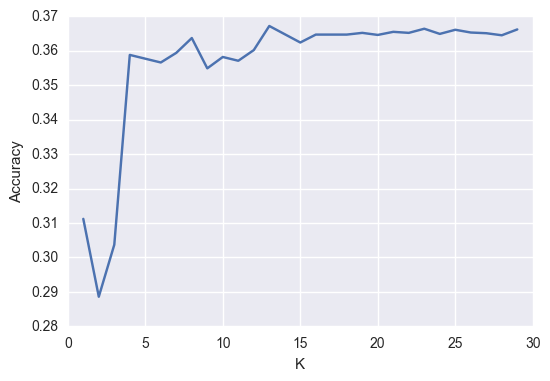

In [42]:
plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")

In [46]:
def cross_val_rmse(X, y):
    linreg = LinearRegression()
    scores = cross_val_score(linreg, X, y, cv=5, scoring='mean_squared_error')
    return np.sqrt(abs(scores)).mean()

In [47]:
feature_cols = ['cool', 'useful', 'funny']
X = data[feature_cols]
cross_val_rmse(X, y)

1.1935729184591994